In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
s=["I love this sandwich","This is an amazing place","I feel very good about these beers","This is my best work",
   "That is an awesome work","I love to dance","I  am sick and tired of this place",
   "I do not like the taste of this juice","My boss is horrible","What a bad locality to stay",
   "We will have good fun tomorrow","I do not like this restaurant","I feel very bad today",
   "I couldn’t solve this problem","I love to play football","I hate fast music"]
l=["pos","pos","pos","pos","pos","pos","neg","neg","neg","neg","pos","neg","neg","neg","pos","neg"]

In [6]:
df=pd.DataFrame({"statement":s,"label":l})
df.to_csv("text.csv",index=False,encoding='utf-8')

In [7]:
print(df)

                                statement label
0                    I love this sandwich   pos
1                This is an amazing place   pos
2      I feel very good about these beers   pos
3                    This is my best work   pos
4                 That is an awesome work   pos
5                         I love to dance   pos
6      I  am sick and tired of this place   neg
7   I do not like the taste of this juice   neg
8                     My boss is horrible   neg
9             What a bad locality to stay   neg
10         We will have good fun tomorrow   pos
11          I do not like this restaurant   neg
12                  I feel very bad today   neg
13          I couldn’t solve this problem   neg
14                I love to play football   pos
15                      I hate fast music   neg


In [8]:
#Checking maximum length of SMS

print(len(df))


16


In [10]:
df.value_counts('label')

label
neg    8
pos    8
dtype: int64

In [11]:
df.describe()

,statement,label
count,16,16
unique,16,2
top,This is my best work,neg
freq,1,8


In [12]:
df['length']=df['statement'].apply(len)
df.head()

,statement,label,length
0,I love this sandwich,pos,20
1,This is an amazing place,pos,24
2,I feel very good about these beers,pos,34
3,This is my best work,pos,20
4,That is an awesome work,pos,23


In [13]:
##Splitting the dataset into training set and test set

x=df['statement'] #independent variable
y=df['label'] #dependent variable

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


In [14]:
# Instantiate the CountVectorizer method

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()


In [15]:
#Fit the training data and then return the matrix
train_data=count_vector.fit_transform(x_train)

# Transform testing data and return the matrix
test_data=count_vector.transform(x_test)


In [16]:
from sklearn.naive_bayes import MultinomialNB   #suitable for classification with discrete features
classifier=MultinomialNB()
classifier.fit(train_data,y_train)


MultinomialNB()

In [17]:
# Predicting the test set results

y_pred = classifier.predict(test_data)
print(y_pred)


['pos' 'neg' 'pos' 'pos']


In [18]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix (y_test, y_pred,labels=classifier.classes_)  
print(cm)

[[1 2]
 [0 1]]


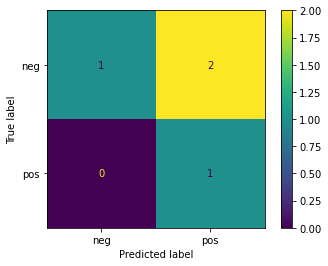

In [19]:
# Making the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [20]:
training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print(training_score)
print(test_score)


1.0
0.5


In [21]:
#Evaluationg our model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="neg")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="neg")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="neg")))


Accuracy score: 0.5
Precision score: 1.0
Recall score: 0.3333333333333333
F1 score: 0.5
